In [1]:
# Import local modules
import sys
import os
import glob

# Import third party modules
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Set up the path to the data
data_path = "/workspaces/MTMA33_Computing/practical_6/data/l4_sst_indianocean.nc"

# Read the data using netCDF4 in read mode
dataset = nc.Dataset(data_path, mode="r")

# Read the data using xarray
dataset_xr = xr.open_dataset(data_path)

# Read the data using iris
dataset_iris_cube = iris.load(data_path)

In [3]:
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Sea surface temperature data from the OSTIA L4 analysis for 1st January 2010.  Data are provided as part of Sea Surface Temperature Climate Change Initiative (SST CCI) project.
    history: Wed Nov 11 18:33:19 2015: ncks -d lon,4201,6000 -d lat,1000,2600 l4_sst.nc l4_sst_indianocean.nc
Created Thu Oct  8 18:08:06 2015
    source: OSTIA L4 data adapted for MTMA33 - Introduction to Computing.
    NCO: 20151111
    dimensions(sizes): lat(1601), lon(1800)
    variables(dimensions): float32 latitude(lat), float32 longitude(lon), float32 sea_water_temperature(lat, lon), float32 sea_water_temperature_uncertainty(lat, lon)
    groups: 

In [4]:
dataset_xr

<xarray.Dataset>
Dimensions:                            (lat: 1601, lon: 1800)
Dimensions without coordinates: lat, lon
Data variables:
    latitude                           (lat) float32 ...
    longitude                          (lon) float32 ...
    sea_water_temperature              (lat, lon) float32 ...
    sea_water_temperature_uncertainty  (lat, lon) float32 ...
Attributes:
    description:  Sea surface temperature data from the OSTIA L4 analysis for...
    history:      Wed Nov 11 18:33:19 2015: ncks -d lon,4201,6000 -d lat,1000...
    source:       OSTIA L4 data adapted for MTMA33 - Introduction to Computing.
    NCO:          20151111

In [5]:
print(dataset_iris_cube)

0: estimated error standard deviation of sea water temperature / (Kelvin) (-- : 1601; -- : 1800)
1: analysed sea surface temperature / (kelvin) (-- : 1601; -- : 1800)
2: latitude / (degrees)                (-- : 1601)
3: longitude / (degrees)               (-- : 1800)


In [6]:
# print the dimensions of the dataset using netCDF4
print(dataset.dimensions)
print(dataset.dimensions.keys())
print(dataset.description)
print(dataset.variables)

{'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 1601, 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 1800}
dict_keys(['lat', 'lon'])
Sea surface temperature data from the OSTIA L4 analysis for 1st January 2010.  Data are provided as part of Sea Surface Temperature Climate Change Initiative (SST CCI) project.
{'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(lat)
    standard_name: latitude
    units: degrees_north
    valid_min: -90.0
    valid_max: 90.0
    axis: Y
    reference_datum: geographical coordinates, WGS84 projection
    long_name: Latitude
unlimited dimensions: 
current shape = (1601,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(lon)
    standard_name: longitude
    units: degrees_east
    valid_min: -180.0
    valid_max: 180.0
    axis: X
    reference_datum: geographical coordinates, WGS84 projection
    long_name: Longitude
unlimited

In [7]:
# print the dimensions of the dataset using xarray
print(dataset_xr.dims)
print(dataset_xr.dims.keys())
print(dataset_xr.attrs)
print(dataset_xr.coords)

# Print the variables of the dataset using xaarray
print(dataset_xr.data_vars)

Frozen({'lat': 1601, 'lon': 1800})
KeysView(Frozen({'lat': 1601, 'lon': 1800}))
{'description': 'Sea surface temperature data from the OSTIA L4 analysis for 1st January 2010.  Data are provided as part of Sea Surface Temperature Climate Change Initiative (SST CCI) project.', 'history': 'Wed Nov 11 18:33:19 2015: ncks -d lon,4201,6000 -d lat,1000,2600 l4_sst.nc l4_sst_indianocean.nc\nCreated Thu Oct  8 18:08:06 2015', 'source': 'OSTIA L4 data adapted for MTMA33 - Introduction to Computing.', 'NCO': '20151111'}
Coordinates:
    *empty*
Data variables:
    latitude                           (lat) float32 ...
    longitude                          (lon) float32 ...
    sea_water_temperature              (lat, lon) float32 ...
    sea_water_temperature_uncertainty  (lat, lon) float32 ...


In [8]:
# Print the variables of the dataset using iris
dataset_iris_cube

[<iris 'Cube' of estimated error standard deviation of sea water temperature / (Kelvin) (-- : 1601; -- : 1800)>,
<iris 'Cube' of analysed sea surface temperature / (kelvin) (-- : 1601; -- : 1800)>,
<iris 'Cube' of latitude / (degrees) (-- : 1601)>,
<iris 'Cube' of longitude / (degrees) (-- : 1800)>]

In [9]:
# Extract the variable of interest using netCDF4
variables = ['sea_water_temperature', 'sea_water_temperature_uncertainty', 'latitude', 'longitude']

# Extract the variables
sea_water_temperature = dataset.variables[variables[0]]
sea_water_temperature_uncertainty = dataset.variables[variables[1]]
latitude = dataset.variables[variables[2]]
longitude = dataset.variables[variables[3]]

# Print the variables
# print("sea_water_temperature: ", sea_water_temperature)
# print("sea_water_temperature_uncertainty: ", sea_water_temperature_uncertainty)
# print("latitude: ", latitude)
# print("longitude: ", longitude)

# Extract the variable into a numpy array
sea_water_temperature_array = sea_water_temperature[:, :]
sea_water_temperature_uncertainty_array = sea_water_temperature_uncertainty[:, :]
latitude_array = latitude[:]
longitude_array = longitude[:]

In [10]:
# Extract the variable of interest using xarray
sea_water_temperature_uncertainty_xr = dataset_xr.variables[variables[1]]
sea_water_temperature_xr = dataset_xr.variables[variables[0]]
latitude_xr = dataset_xr.variables[variables[2]]
longitude_xr = dataset_xr.variables[variables[3]]

# Print the variables
# print("sea_water_temperature: ", sea_water_temperature_xr)
# print("sea_water_temperature_uncertainty: ", sea_water_temperature_uncertainty_xr)
# print("latitude: ", latitude_xr)
# print("longitude: ", longitude_xr)

# Extract the variables into a numpy array
sea_water_temperature_array_xr = sea_water_temperature_xr.to_numpy()
sea_water_temperature_uncertainty_array_xr = sea_water_temperature_uncertainty_xr.to_numpy()
latitude_array_xr = latitude_xr.to_numpy()
longitude_array_xr = longitude_xr.to_numpy()

In [11]:
# Extract the variable of interest using iris
sea_water_temperature_iris = dataset_iris_cube[1]
sea_water_temperature_uncertainty_iris = dataset_iris_cube[0]
latitude_iris = dataset_iris_cube[2]
longitude_iris = dataset_iris_cube[3]

# Print the variables
# print("sea_water_temperature: ", sea_water_temperature_iris)
# print("sea_water_temperature_uncertainty: ", sea_water_temperature_uncertainty_iris)
# print("latitude: ", latitude_iris)
# print("longitude: ", longitude_iris)

# Extract the variables into a numpy array
sea_water_temperature_array_iris = sea_water_temperature_iris.data
sea_water_temperature_uncertainty_array_iris = sea_water_temperature_uncertainty_iris.data
latitude_array_iris = latitude_iris.data
longitude_array_iris = longitude_iris.data

equator_index:  799
subtropics_index:  1199


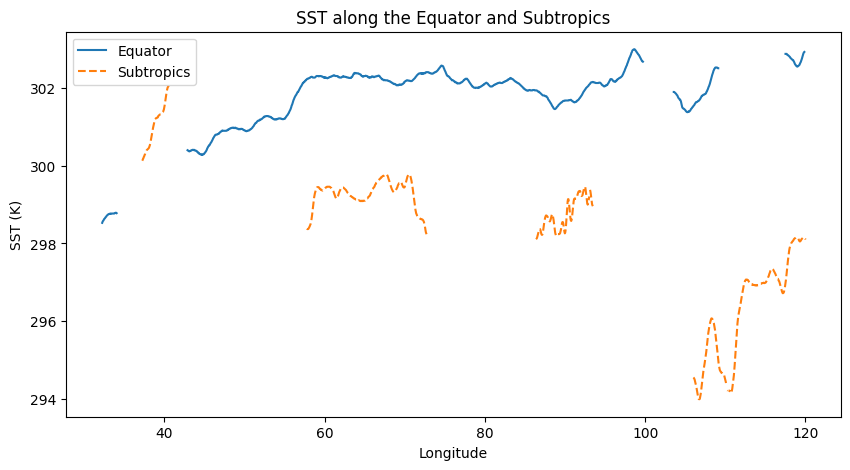

In [12]:
# Use the arrays generated from the netCDF4 dataset to plot the data
# We want to create a plot of SST along the equator against longitude
# Find the index of the latitude closest to the equator
equator_index = np.where(np.abs(latitude_array) == np.abs(latitude_array).min())[0][0]
print("equator_index: ", equator_index)

# Set the subtropics example lat
subtropics_lat = 20

# Find the index of the latitude closest to the subtropics
subtropics_index = np.where(np.min(np.abs(latitude_array - subtropics_lat)) == np.abs(latitude_array - subtropics_lat))[0][0]
print("subtropics_index: ", subtropics_index)

# Extract the SST along the equator
sst_equator = sea_water_temperature_array[equator_index, :]
sst_subtropics = sea_water_temperature_array[subtropics_index, :]

# Plot the SST along the equator against longitude
plt.figure(figsize=(10, 5))
plt.plot(longitude_array, sst_equator, label="Equator")
plt.plot(longitude_array, sst_subtropics, label="Subtropics", linestyle="--")
plt.title("SST along the Equator and Subtropics")
plt.xlabel("Longitude")
plt.ylabel("SST (K)")
plt.legend()


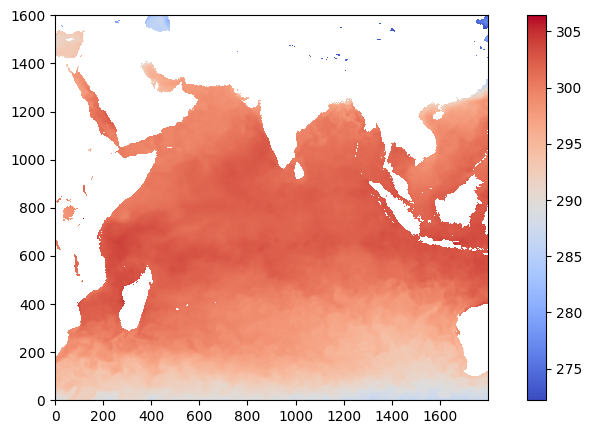

In [13]:
# Make a 2D plot of global SST and include a colorbar
# Create a figure
plt.figure(figsize=(10, 5))

# Use plot.imshow to plot the SST
plt.imshow(sea_water_temperature_array, interpolation='nearest', origin='lower', cmap='coolwarm')

# Add a colorbar
plt.colorbar()

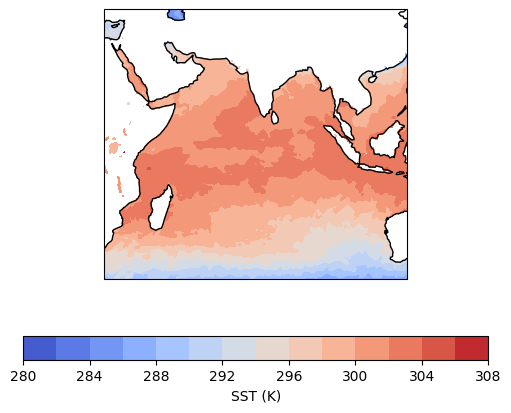

In [14]:
# Make the same plot using xarray
# Create a figure
# set up the lons and lats and sst
lons = longitude_array_xr
lats = latitude_array_xr
sst = sea_water_temperature_array_xr

# Set up the figure
plt.figure(figsize=(10, 5))

# Set up the axes
ax = plt.axes(projection=ccrs.PlateCarree())

# Set up the levels for the contour plot
levels = np.arange(280, 310, 2)

# Plot the data
plot = ax.contourf(lons, lats, sst, levels, transform=ccrs.PlateCarree(), cmap='coolwarm')

# Add coastlines
ax.coastlines()

# Set up the colorbar
cbar = plt.colorbar(plot, orientation='horizontal', shrink=0.6)
cbar.set_label('SST (K)')

# Show the plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

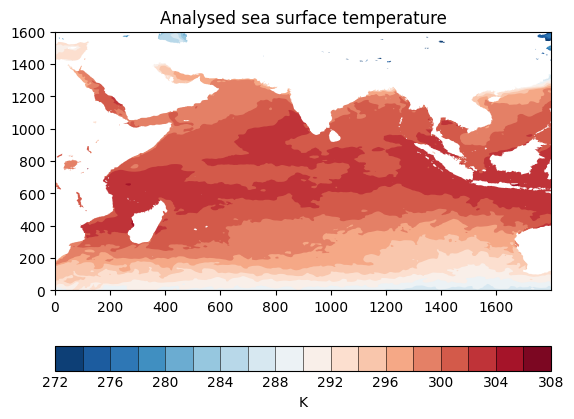

In [17]:
# DO the same with the iris data
# Draw a contour plot of the SST
# with 12 levels
qplt.contourf(sea_water_temperature_iris, 20, cmap='RdBu_r')

# Rename the coordinates to latitude and longitude
# sea_water_temperature_iris.coord('latitude').rename('latitude')
# sea_water_temperature_iris.coord('longitude').rename('longitude')

# # Add coastlines - doesn't work
# qplt.plt.gca().coastlines()

# Show the plot
qplt.show

In [21]:
# Modify the contents of the sea surface temperature array (from NetCDF4) 
# To convert the units from Kelvin to Celsius
# And save this new variable into a new NetCDF4 file
# Make sure global and variable attributes are copied over
# Create a new variable with the new units
sea_water_temperature_celsius = sea_water_temperature_array - 273.15

# Create a new NetCDF4 file
# Set up the path to the new file
new_data_path = "/workspaces/MTMA33_Computing/practical_6/data/l4_sst_indianocean_celsius.nc"

# Create the new file
new_dataset = nc.Dataset(new_data_path, mode="w", format="NETCDF4")

# Copy the global attributes
new_dataset.setncatts(dataset.__dict__)

# Create the dimensions
new_dataset.createDimension('latitude', len(latitude_array))
new_dataset.createDimension('longitude', len(longitude_array))
new_dataset.createDimension('time', None)
new_dataset.createDimension('sea_water_temperature', None)

# Create the variables
new_latitude = new_dataset.createVariable('latitude', np.float32, ('latitude',))
new_longitude = new_dataset.createVariable('longitude', np.float32, ('longitude',))
new_sea_water_temperature = new_dataset.createVariable('sea_water_temperature', np.float32, ('time', 'latitude', 'longitude',))

# Copy the variable attributes
new_latitude.setncatts(latitude.__dict__)
new_longitude.setncatts(longitude.__dict__)
new_sea_water_temperature.setncatts(sea_water_temperature.__dict__)

# Copy the variable data
new_latitude[:] = latitude_array
new_longitude[:] = longitude_array
new_sea_water_temperature[:] = sea_water_temperature_celsius[:]
new_dataset.close()

PermissionError: [Errno 13] Permission denied: '/workspaces/MTMA33_Computing/practical_6/data/l4_sst_indianocean_celsius.nc'